In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 16.8 MB/s eta 0:00:00


In [2]:
pip install torchinfo

In [3]:
pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/MyDrive/data/custom_dataset

!unzip -qq "/content/drive/MyDrive/data/custom_dataset.zip"

/content/drive/MyDrive/data/custom_dataset
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [7]:
from torchinfo import summary

In [8]:
from roboflow import Roboflow

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import pandas as pd

In [11]:
model = YOLO("yolo11n.pt")

In [12]:
summary(model.model, input_size=(1, 3, 640, 640))

Layer (type:depth-idx)                                       Output Shape              Param #
DetectionModel                                               [1, 84, 8400]             --
├─Sequential: 1-1                                            --                        --
│    └─Conv: 2-1                                             [1, 16, 320, 320]         --
│    │    └─Conv2d: 3-1                                      [1, 16, 320, 320]         (432)
│    │    └─BatchNorm2d: 3-2                                 [1, 16, 320, 320]         (32)
│    └─Detect: 2-124                                         --                        (recursive)
│    │    └─ModuleList: 3-147                                --                        (recursive)
│    └─Conv: 2-3                                             [1, 32, 160, 160]         --
│    │    └─Conv2d: 3-4                                      [1, 32, 160, 160]         (4,608)
│    │    └─BatchNorm2d: 3-5                                 [1, 32

In [14]:
dataset_dir = '/content/drive/MyDrive/data/custom_dataset/data.yaml'

In [15]:
results = model.train(data=dataset_dir, epochs=100, patience=8, imgsz=640)

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/drive/MyDrive/data/custom_dataset/data.yaml, epochs=100, time=None, patience=8, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 15.4MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/data/custom_dataset/train/labels.cache... 20000 images, 185 backgrounds, 0 corrupt: 100%|██████████| 20000/20000 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 119524. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/drive/MyDrive/data/custom_dataset/valid/labels.cache... 1850 images, 13 backgrounds, 0 corrupt: 100%|██████████| 1850/1850 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/data/custom_dataset/valid/images/007119_jpeg.rf.7e263e04758c92adf0ec2e7ff25d50da.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.31G      1.405      1.827      1.213        109        640: 100%|██████████| 1250/1250 [04:46<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:24<00:00,  2.38it/s]


                   all       1850      12022      0.647      0.402      0.438      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.34G      1.353      1.313      1.167        112        640: 100%|██████████| 1250/1250 [02:34<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:09<00:00,  6.10it/s]


                   all       1850      12022      0.597      0.519      0.531      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.58G      1.383      1.241      1.187        210        640: 100%|██████████| 1250/1250 [02:30<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:09<00:00,  6.31it/s]


                   all       1850      12022      0.614      0.462      0.523      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.61G      1.396      1.181      1.197        155        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.70it/s]


                   all       1850      12022       0.59      0.502      0.526      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.46G      1.337      1.075      1.168        102        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.84it/s]


                   all       1850      12022        0.7      0.537      0.611      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.11G      1.297      1.013      1.151        154        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.76it/s]


                   all       1850      12022      0.708      0.576       0.62      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         3G      1.272      0.975       1.14        177        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.65it/s]


                   all       1850      12022      0.704      0.626      0.673      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       3.2G      1.245     0.9388      1.125        117        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.51it/s]


                   all       1850      12022       0.73      0.623      0.688      0.441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       3.4G      1.224     0.9134      1.117        148        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.60it/s]


                   all       1850      12022       0.72      0.629      0.686      0.459

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.76G      1.208     0.8916      1.109        203        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.74it/s]


                   all       1850      12022      0.742      0.619      0.689      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.39G        1.2       0.88      1.106        201        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022      0.763      0.632      0.721      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.4G      1.185     0.8589      1.097        273        640: 100%|██████████| 1250/1250 [02:31<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022       0.77      0.664      0.748      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.81G      1.172     0.8479       1.09        118        640: 100%|██████████| 1250/1250 [02:30<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.61it/s]


                   all       1850      12022      0.777      0.685       0.77      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.99G      1.167     0.8357      1.085        150        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.51it/s]


                   all       1850      12022      0.786      0.672      0.765       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.18G      1.163     0.8295      1.081        167        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.47it/s]


                   all       1850      12022      0.814      0.693      0.783      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.97G      1.151     0.8192      1.079        196        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.51it/s]


                   all       1850      12022      0.827      0.694      0.802      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.11G       1.14     0.8098      1.076        215        640: 100%|██████████| 1250/1250 [02:30<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.73it/s]


                   all       1850      12022       0.81      0.714      0.805      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.21G      1.132     0.7953      1.072        154        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.86it/s]


                   all       1850      12022       0.83      0.733      0.815      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.47G      1.123     0.7895      1.069        133        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.93it/s]


                   all       1850      12022      0.834      0.729      0.815      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.24G      1.125     0.7866      1.067        108        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022      0.835      0.725      0.817      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.08G      1.113     0.7763       1.06        167        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.57it/s]


                   all       1850      12022      0.818       0.74      0.823      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.46G      1.112     0.7711       1.06        226        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.67it/s]


                   all       1850      12022       0.82       0.74      0.819       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.27G      1.105     0.7668      1.058        118        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.65it/s]


                   all       1850      12022      0.839      0.739      0.828      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.36G      1.101     0.7595      1.057        150        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.85it/s]


                   all       1850      12022      0.827      0.757      0.835      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.28G      1.093     0.7548      1.053        169        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.75it/s]


                   all       1850      12022      0.857      0.732      0.835      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.22G      1.091     0.7465       1.05        121        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.77it/s]


                   all       1850      12022      0.845      0.749      0.838      0.609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.39G      1.084     0.7427      1.049         99        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.59it/s]


                   all       1850      12022      0.817      0.767      0.839      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.21G      1.082     0.7419      1.048        140        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.53it/s]


                   all       1850      12022      0.845      0.759      0.847      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.97G      1.076     0.7342      1.046        147        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.46it/s]


                   all       1850      12022      0.844      0.769      0.848       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.18G      1.073     0.7328      1.043        163        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.54it/s]


                   all       1850      12022      0.855      0.763       0.85      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.27G      1.072     0.7289      1.042        165        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.72it/s]


                   all       1850      12022      0.848      0.775      0.854      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.22G      1.066     0.7226      1.039        156        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.89it/s]


                   all       1850      12022      0.848      0.773      0.855      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.4G      1.066      0.722      1.038        151        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.95it/s]


                   all       1850      12022      0.849      0.773      0.854      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.38G       1.06     0.7148      1.035        161        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.71it/s]


                   all       1850      12022      0.852      0.773      0.857      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.15G      1.058     0.7145      1.037        101        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.55it/s]


                   all       1850      12022      0.839      0.784      0.858      0.636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.13G      1.052     0.7109      1.035        169        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.59it/s]


                   all       1850      12022      0.857      0.773      0.859      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.63G       1.05     0.7077      1.033        120        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.66it/s]


                   all       1850      12022       0.85      0.779      0.862      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.31G      1.045      0.702      1.032        217        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.84it/s]


                   all       1850      12022      0.856      0.781      0.861      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.99G       1.04     0.6996      1.031        127        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.97it/s]


                   all       1850      12022      0.861      0.783      0.863      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100       3.2G      1.042     0.6962      1.027        142        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.83it/s]


                   all       1850      12022      0.855      0.791      0.865      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.25G      1.037     0.6947      1.027        162        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.79it/s]


                   all       1850      12022      0.849      0.792      0.866      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.26G      1.035     0.6912      1.027        179        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022      0.838      0.797      0.867      0.647

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.34G      1.029     0.6864      1.026        228        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.53it/s]


                   all       1850      12022      0.853      0.795      0.869       0.65

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.57G      1.029     0.6838      1.023        132        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.53it/s]


                   all       1850      12022      0.864      0.789      0.871      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.31G      1.028     0.6811      1.024        161        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.60it/s]


                   all       1850      12022      0.873      0.788      0.872      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.21G      1.027     0.6796      1.022        103        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.68it/s]


                   all       1850      12022       0.88      0.784      0.871      0.652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.04G      1.019     0.6755       1.02        171        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.96it/s]


                   all       1850      12022      0.881      0.787      0.871      0.655

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.09G       1.02     0.6738      1.016        192        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.88it/s]


                   all       1850      12022       0.87       0.79      0.871      0.656

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.73G      1.017     0.6737      1.018        171        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.88it/s]


                   all       1850      12022      0.875      0.786      0.871      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.33G      1.009     0.6684      1.016        161        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.86it/s]


                   all       1850      12022       0.87       0.79      0.872      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.22G      1.011     0.6659      1.015        141        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.54it/s]


                   all       1850      12022      0.871      0.791      0.873      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.08G      1.007     0.6642      1.014        158        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.63it/s]


                   all       1850      12022      0.864      0.798      0.873      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.21G      1.001     0.6606      1.012        208        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.68it/s]


                   all       1850      12022       0.87      0.798      0.873       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.94G      1.001     0.6572       1.01        145        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.90it/s]


                   all       1850      12022      0.866      0.799      0.874      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.17G     0.9947     0.6528       1.01        163        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.84it/s]


                   all       1850      12022      0.866        0.8      0.874      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.55G     0.9969     0.6513      1.009        120        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.75it/s]


                   all       1850      12022      0.872      0.798      0.875      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.31G     0.9927     0.6478      1.006        140        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.57it/s]


                   all       1850      12022       0.87      0.799      0.875      0.661

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.92G     0.9898     0.6464      1.005        140        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:09<00:00,  6.37it/s]


                   all       1850      12022      0.873      0.798      0.875      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.89G     0.9839     0.6408      1.005        142        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.51it/s]


                   all       1850      12022      0.869      0.799      0.876      0.663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.43G     0.9877     0.6446      1.004        102        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.85it/s]


                   all       1850      12022      0.864      0.806      0.877      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.57G     0.9807     0.6391      1.003        161        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.85it/s]


                   all       1850      12022      0.866      0.806      0.878      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.21G     0.9776     0.6362      1.002        179        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.73it/s]


                   all       1850      12022      0.873      0.804      0.878      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.39G     0.9741     0.6338     0.9999        100        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022      0.868      0.806      0.879      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.64G     0.9759     0.6321          1        122        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.53it/s]


                   all       1850      12022       0.87      0.804      0.879      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.04G     0.9646     0.6243      0.996        136        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.58it/s]


                   all       1850      12022      0.873      0.805      0.881      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.01G     0.9688     0.6278     0.9974        147        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.76it/s]


                   all       1850      12022       0.87      0.807      0.881      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.33G     0.9649     0.6237     0.9971        102        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.81it/s]


                   all       1850      12022      0.868      0.807      0.881      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.31G     0.9626     0.6208     0.9952        115        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.87it/s]


                   all       1850      12022      0.867      0.807      0.881      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.46G      0.958     0.6189     0.9939        119        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.80it/s]


                   all       1850      12022      0.872      0.805      0.881      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.41G     0.9592      0.618     0.9949        121        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.68it/s]


                   all       1850      12022      0.866      0.809      0.881      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.2G     0.9525     0.6133     0.9907        165        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.58it/s]


                   all       1850      12022      0.865      0.811      0.882      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.34G     0.9463     0.6101     0.9899        141        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.49it/s]


                   all       1850      12022      0.868      0.811      0.882       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.41G      0.947     0.6081     0.9881        126        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.64it/s]


                   all       1850      12022      0.867      0.812      0.882      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.41G     0.9442     0.6059      0.988        170        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.84it/s]


                   all       1850      12022       0.87      0.813      0.882      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.08G     0.9434     0.6037      0.987        145        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.72it/s]


                   all       1850      12022      0.864      0.817      0.883      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.24G     0.9387     0.6008      0.985        189        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.85it/s]


                   all       1850      12022      0.866      0.816      0.883      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.51G     0.9362     0.5998     0.9841        241        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.76it/s]


                   all       1850      12022      0.872      0.813      0.883      0.671

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.55G     0.9339     0.5972     0.9821        192        640: 100%|██████████| 1250/1250 [02:30<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.62it/s]


                   all       1850      12022      0.871      0.813      0.883      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.7G     0.9307     0.5926      0.983        194        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:09<00:00,  6.38it/s]


                   all       1850      12022       0.87      0.813      0.883      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.58G     0.9311     0.5914     0.9822        129        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022      0.865      0.816      0.883      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.18G     0.9229     0.5874     0.9811        167        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.72it/s]


                   all       1850      12022      0.866      0.815      0.884      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       3.3G     0.9239     0.5861     0.9793        188        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.97it/s]


                   all       1850      12022      0.864      0.819      0.884      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       3.4G     0.9211     0.5857     0.9786        111        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.91it/s]


                   all       1850      12022      0.862       0.82      0.884      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.66G       0.92     0.5815     0.9777        107        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.60it/s]


                   all       1850      12022      0.859      0.824      0.884      0.675

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         3G     0.9137     0.5778     0.9742        159        640: 100%|██████████| 1250/1250 [02:30<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:09<00:00,  6.44it/s]


                   all       1850      12022       0.86      0.824      0.885      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       3.6G     0.9129     0.5779     0.9763        217        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.67it/s]


                   all       1850      12022      0.861      0.823      0.885      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.08G     0.9119     0.5783     0.9752        142        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.78it/s]


                   all       1850      12022       0.86      0.824      0.885      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.86G     0.9076     0.5731      0.974        158        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.71it/s]


                   all       1850      12022      0.859      0.823      0.885      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.06G     0.9043     0.5714     0.9725        173        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.80it/s]


                   all       1850      12022       0.86      0.824      0.886      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.57G     0.8966      0.567     0.9701        246        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.69it/s]


                   all       1850      12022       0.86      0.823      0.886      0.678
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.07G     0.8821     0.5331     0.9578         88        640: 100%|██████████| 1250/1250 [02:29<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.75it/s]


                   all       1850      12022      0.859      0.825      0.886      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.22G     0.8742     0.5274     0.9551         65        640: 100%|██████████| 1250/1250 [02:27<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.79it/s]


                   all       1850      12022      0.857      0.825      0.886      0.679

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.04G       0.87     0.5232     0.9525        108        640: 100%|██████████| 1250/1250 [02:27<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.84it/s]


                   all       1850      12022      0.862      0.825      0.887       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.19G     0.8637     0.5178       0.95        155        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.78it/s]


                   all       1850      12022      0.862      0.826      0.887       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.95G     0.8594     0.5149     0.9495         76        640: 100%|██████████| 1250/1250 [02:27<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:09<00:00,  6.44it/s]


                   all       1850      12022      0.864      0.824      0.887      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       3.2G     0.8544     0.5127     0.9481         88        640: 100%|██████████| 1250/1250 [02:27<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.51it/s]


                   all       1850      12022      0.864      0.825      0.887      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.22G     0.8501     0.5091      0.947        108        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.59it/s]


                   all       1850      12022      0.865      0.824      0.887      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         3G     0.8475     0.5067     0.9456         95        640: 100%|██████████| 1250/1250 [02:28<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.82it/s]


                   all       1850      12022      0.861      0.824      0.887      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.23G     0.8457     0.5036     0.9425        136        640: 100%|██████████| 1250/1250 [02:27<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.66it/s]


                   all       1850      12022      0.859      0.825      0.887      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.99G     0.8408     0.5008     0.9418         59        640: 100%|██████████| 1250/1250 [02:27<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:08<00:00,  6.73it/s]


                   all       1850      12022       0.86      0.826      0.888      0.682

100 epochs completed in 4.461 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 58/58 [00:11<00:00,  5.27it/s]


                   all       1850      12022      0.859      0.826      0.888      0.682
             emergency         98        109      0.888      0.943      0.968      0.747
                   car       1585       9186      0.905      0.848      0.924      0.694
                   van        237        280      0.855      0.768      0.865       0.68
                 truck         74         74      0.937      0.986      0.974      0.855
                person        543       2052      0.868      0.626      0.781      0.462
               cyclist        185        267      0.705      0.644      0.725       0.51
                  tram         23         54      0.855      0.963      0.975      0.822
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f53ac7c5050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
csv_path = '/data/runs/detect/train3/results.csv'

In [ ]:
data = pd.read_csv(csv_path)

In [ ]:
print("Available columns:", data.columns)

Available columns: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


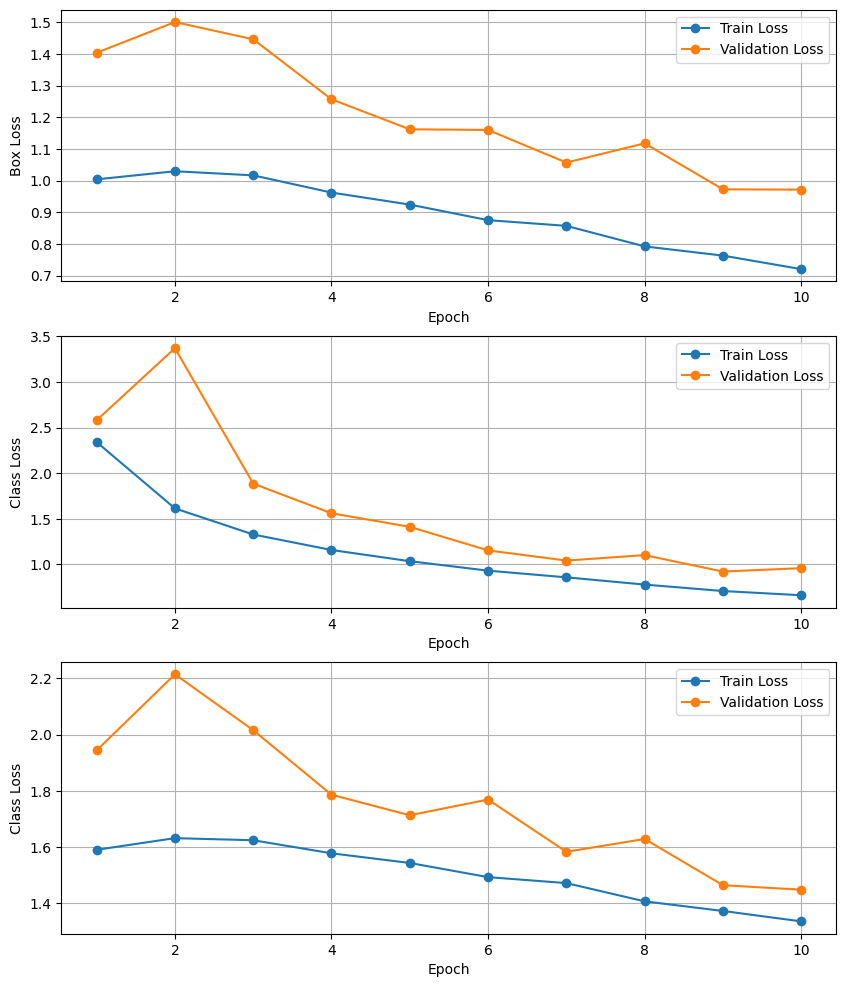

In [ ]:
plt.figure(figsize=(10, 12))

plt.subplot(311)
plt.plot(data['epoch'], data['train/box_loss'], label='Train Loss', marker='o')
plt.plot(data['epoch'], data['val/box_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Box Loss')
plt.legend()
plt.grid()

plt.subplot(312)
plt.plot(data['epoch'], data['train/cls_loss'], label='Train Loss', marker='o')
plt.plot(data['epoch'], data['val/cls_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.legend()
plt.grid()

plt.subplot(313)
plt.plot(data['epoch'], data['train/dfl_loss'], label='Train Loss', marker='o')
plt.plot(data['epoch'], data['val/dfl_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Class Loss')
plt.legend()
plt.grid()
plt.show()

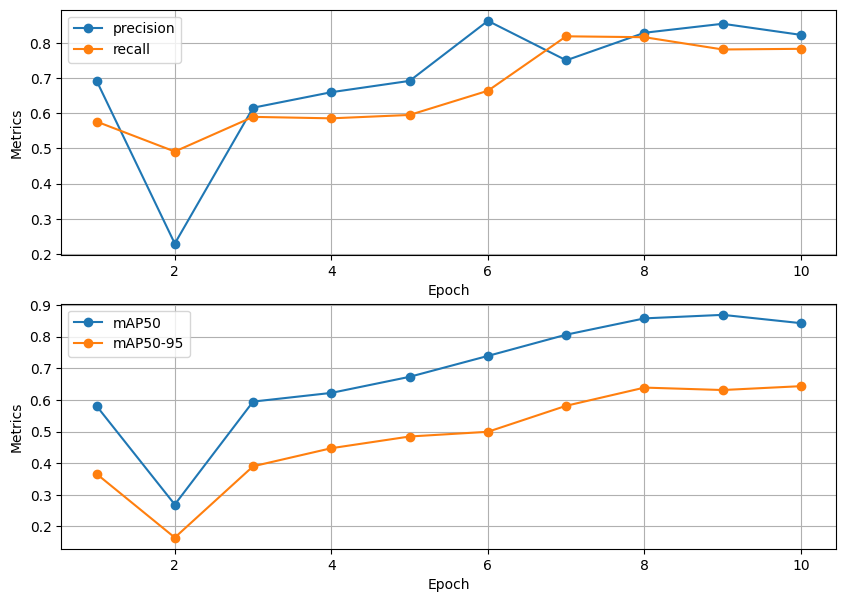

In [ ]:
plt.figure(figsize=(10, 7))

plt.subplot(211)
plt.plot(data['epoch'], data['metrics/precision(B)'], label='precision', marker='o')
plt.plot(data['epoch'], data['metrics/recall(B)'], label='recall', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(data['epoch'], data['metrics/mAP50(B)'], label='mAP50', marker='o')
plt.plot(data['epoch'], data['metrics/mAP50-95(B)'], label='mAP50-95', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.legend()
plt.grid()
plt.show()


image 1/1 /content/drive/MyDrive/test_img/test1.jpg: 448x640 18 cars, 6 persons, 60.5ms
Speed: 1.7ms preprocess, 60.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


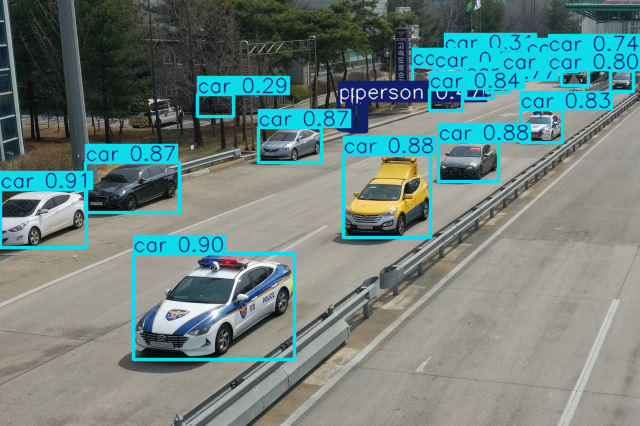

In [16]:
test1 = model("/content/drive/MyDrive/test_img/test1.jpg")
test1[0].show()


image 1/1 /content/drive/MyDrive/test_img/test2.png: 448x640 32 cars, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


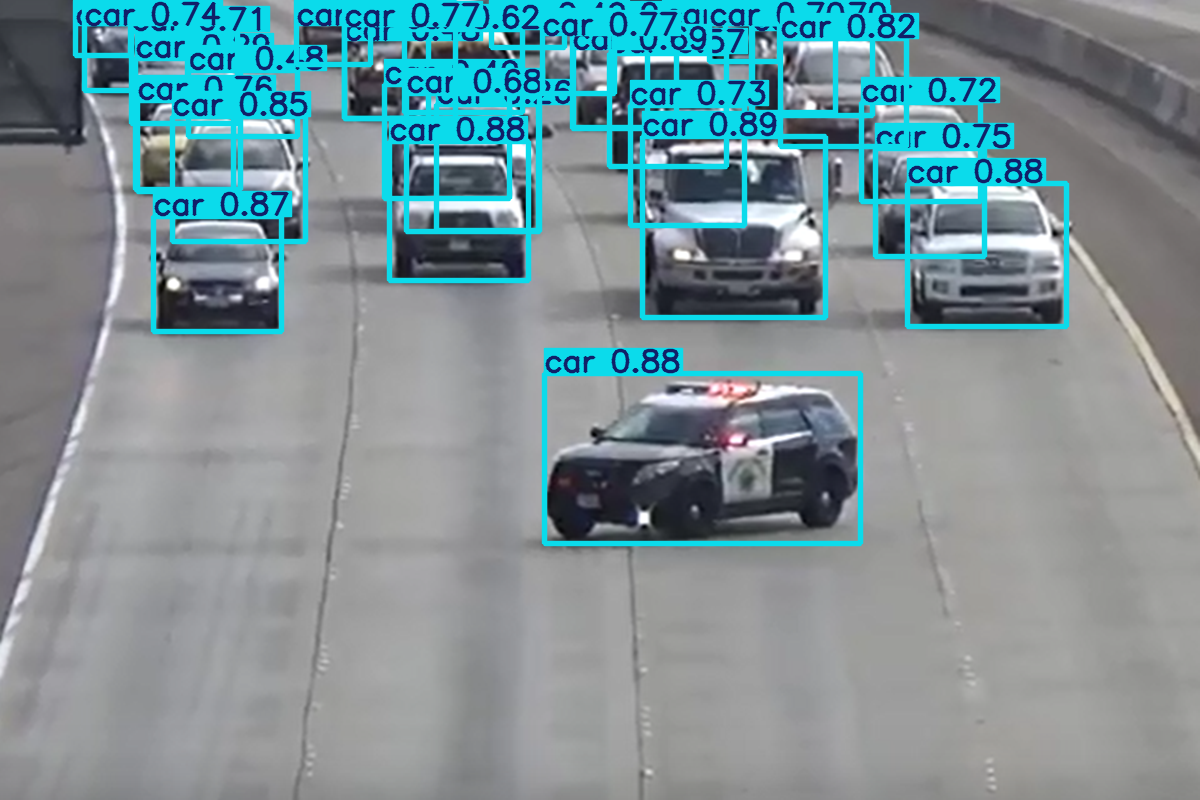

In [17]:
test1 = model("/content/drive/MyDrive/test_img/test2.png")
test1[0].show()


image 1/1 /content/drive/MyDrive/test_img/test3.jpg: 448x640 3 emergencys, 7 cars, 11.1ms
Speed: 2.5ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


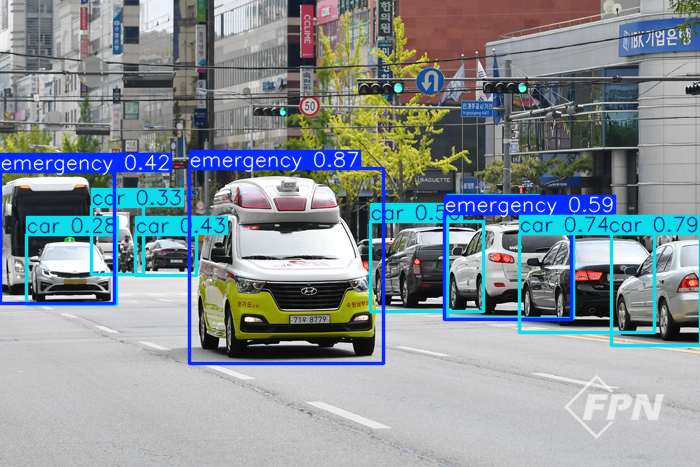

In [18]:
test1 = model("/content/drive/MyDrive/test_img/test3.jpg")
test1[0].show()


image 1/1 /content/drive/MyDrive/test_img/test4.jpg: 416x640 15 cars, 1 person, 78.0ms
Speed: 3.3ms preprocess, 78.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


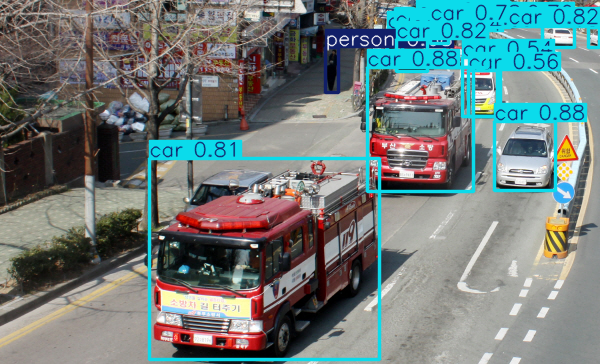

In [19]:
test1 = model("/content/drive/MyDrive/test_img/test4.jpg")
test1[0].show()


image 1/1 /content/drive/MyDrive/test_img/test10.jpg: 384x640 9 emergencys, 2 cars, 60.6ms
Speed: 2.5ms preprocess, 60.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


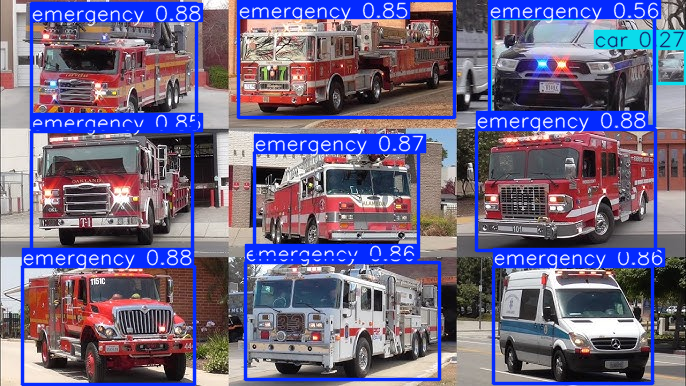

In [22]:
test8 = model("/content/drive/MyDrive/test_img/test10.jpg")
test8[0].show()


image 1/1 /content/drive/MyDrive/test_img/test11.jpg: 384x640 6 cars, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


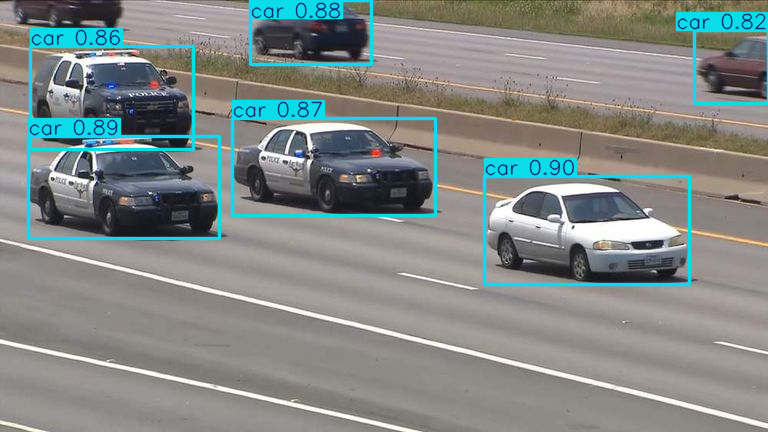

In [23]:
test8 = model("/content/drive/MyDrive/test_img/test11.jpg")
test8[0].show()


image 1/1 /content/drive/MyDrive/test_img/test12.jpg: 384x640 4 cars, 12.5ms
Speed: 2.6ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


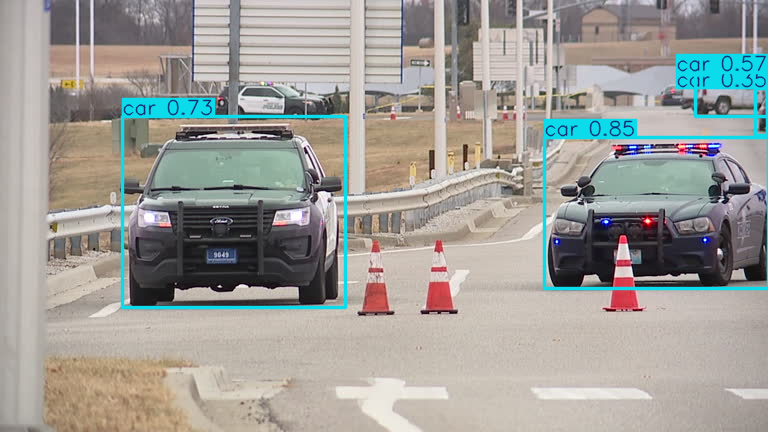

In [24]:
test8 = model("/content/drive/MyDrive/test_img/test12.jpg")
test8[0].show()